Working with Pandas DataFrames
===========================

<div class="overview">
   <p class="overview-title">Overview</p>
    <p>Questions</p>
        <ul>
            <li>Question 1
        </ul>
    <p>Objectives:</p>
        <ul>
            <li>Objective 1
            <li>Objective 2
        </ul>
    <p>Keypoints:</p>
        <ul>
            <li>Keypoint 1</li>
            <li>Keypoint 2</li>
        </ul>
    </div>

Pandas is a Python library used for data analysis and manipulation. Within the world of data science, it is a ubiquitous and widely used library. If you are learning how to analyze data in Python, it will be almost impossible to avoid pandas. 

For this workshop, we will be using two types of data structues - NumPy arrays and pandas DataFrames. Pandas dataframes are specifically for data which is two dimensional (rows and columns). NumPy arrays, while similar in some ways, are meant to work with higher dimensional data. We'll see this in a future lesson.

Pandas is very powerful. In this session, we'll be learning how to access information in pandas dataframes and how to do some basic manipulation and analysis. The first step in using pandas is importing it. Typically when pandas is imported, it is shortened to `pd`. We are also importing `os` here to build a file path.

In [1]:
import os
import pandas as pd

The first data set we are looking at in this class is solubility data. This is a data set which gives molecular descriptors along with solubility calculated using the ESOL method. The data was obtained from [this website](http://moleculenet.ai/datasets-1) and you can read more about the method [here](https://www.moreisdifferent.com/assets/DIY_drug_discovery/Delaney_paper.pdf). The dataset has been downloaded and placed in your `data` folder.

Later in the workshop, we'll be seing how we can fit this model ourselves using Python, but for now we are just going to examine the data using pandas. The data is saved in a csv file. CSV stands for "comma separated values". This is a file format where commas separate values. You can also typically read files like this into excel. In fact, initially in this session you may not yet see what advantages pandas offers over Excel. However, functionalites in pandas will be more useful once we start cleaning and fitting data.

In [2]:
file_path = os.path.join("data", "delaney-processed.csv")
df = pd.read_csv(file_path)

## Examining the data

Now that we have used the pandas `read_csv` function, our data is in a variable called `df`. This variable is a **pandas dataframe**. This means it has lots of special functionalities thanks to pandas. For example, you can preview the first 5 rows using the `.head` function.

In [3]:
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


The `.info` function will give information about the columns and the data type of those columns. The data type will become very important later as we work with more data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   object 
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in mols per litre        1128 non-null   float64
 9   smiles                        

Pandas assigns data types to columns, and will do its best to decide the data column for each column based on what is in the column. You will see that this dataframe has `1128` values in each column. 

We see that the column `Minimum Degree` has the data type of `int64`. Here, `int` means `integer` and `64` means `64 bit`.  The `64 bit` refers to the amount of computer memory the variable can occupy. It won't really be important for us. Similarly, `float64` means `64 bit floating point`. These are decimal numbers.

The other column names which read `object` are not numeric. They might be strings or they might be something else. We'll discuss more later.

The `describe` function can be used on a dataframe to quickly see statistics about columns with numerical data. If you look at the columns that statistics are computed for and compare to the data type shown from `info`, you will see that we only get statistics for columns which had `int64` or `float64` data types.

In [5]:
df.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


## Accessing Data

One great thing about pandas dataframes is how easy it is to access information. Pandas allows you to access information in a dataframe using both data indexes and names.

Pandas dataframes have rows and columns, you can see how many rows and columns using `.shape`. This will return the shape as `(num_rows, num_columns)`.

In [6]:
df.shape

(1128, 10)

### Accessing with rows and column numbers 

#### The `.iloc` function
Access on a particular row and column using `.iloc` followed by squarre brackets and the row and column numbers yoou want to access. If you only put one number, it will be assumed to be the row number you want.

The following gets row number 35.

In [7]:
df.iloc[35]

Compound ID                                        Valeraldehyde
ESOL predicted log solubility in mols per litre           -1.103
Minimum Degree                                                 1
Molecular Weight                                          86.134
Number of H-Bond Donors                                        0
Number of Rings                                                0
Number of Rotatable Bonds                                      3
Polar Surface Area                                         17.07
measured log solubility in mols per litre                  -0.85
smiles                                                   CCCCC=O
Name: 35, dtype: object

We can also specify a number of columns, by adding a column then listing the index numbers for the columns we would like.

In [8]:
df.iloc[35, :3]

Compound ID                                        Valeraldehyde
ESOL predicted log solubility in mols per litre           -1.103
Minimum Degree                                                 1
Name: 35, dtype: object

### Accessing with names

Each dataframe has an index (rows) and columns. The rows and columns have names. For the columns, these are indicated in `.head` by the bold row at the top of the dataframe. The row names are similarly listed in bold in the left of the dataframe. The index can be named, but by default it is usually just numbered. 

You can see information about the index or the columns using `df.index` or `df.columns`.

In [9]:
df.index

RangeIndex(start=0, stop=1128, step=1)

In [10]:
df.columns

Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles'],
      dtype='object')

To access part of a dataframe using the index or column names, would use the `loc` function.

Because our index names are just numbers, this doesn't look that different than `iloc` when we are accessing rows.

#### The `.loc` function

In [11]:
df.loc[35]

Compound ID                                        Valeraldehyde
ESOL predicted log solubility in mols per litre           -1.103
Minimum Degree                                                 1
Molecular Weight                                          86.134
Number of H-Bond Donors                                        0
Number of Rings                                                0
Number of Rotatable Bonds                                      3
Polar Surface Area                                         17.07
measured log solubility in mols per litre                  -0.85
smiles                                                   CCCCC=O
Name: 35, dtype: object

However, we can now use column names

In [12]:
df.loc[35, "smiles"]

'CCCCC=O'

#### Using column names

You can pull a column of several columns of information using the syntax

```python
df[column_name]
```

To pull several columns, do

```python
df[[colname1, colname2]]
```

For example

In [19]:
df["Compound ID"]

0            Amigdalin
1             Fenfuram
2               citral
3               Picene
4            Thiophene
             ...      
1123         halothane
1124            Oxamyl
1125         Thiometon
1126    2-Methylbutane
1127          Stirofos
Name: Compound ID, Length: 1128, dtype: object

In [21]:
df[["Compound ID", "smiles"]]

,Compound ID,smiles
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2
2,citral,CC(C)=CCCC(C)=CC(=O)
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,c1ccsc1
...,...,...
1123,halothane,FC(F)(F)C(Cl)Br
1124,Oxamyl,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,CCC(C)C


## Filtering Data

There are two ways filtering in dataframes are typically done. Both are shown here for completeness, and because you will see both when looking at code others have written.

In the first method, the strategy is that you first establish where something is true within a dataframe, then use that to filter the dataframe.

In [27]:
df["Polar Surface Area"] >17

0        True
1        True
2        True
3       False
4       False
        ...  
1123    False
1124     True
1125     True
1126    False
1127     True
Name: Polar Surface Area, Length: 1128, dtype: bool

This gives us a list of values with either `True` or `False` that can be used to index into the dataframe.

In [29]:
df[df["Polar Surface Area"] > 17]

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,Polar Surface Area (nm^2)
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,2.0232
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,0.4224
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),0.1707
7,Estradiol,-4.138,1,272.388,2,4,0,40.46,-5.030,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O,0.4046
9,Rotenone,-5.246,1,394.423,0,5,3,63.22,-4.420,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C,0.6322
...,...,...,...,...,...,...,...,...,...,...,...
1121,Phthalonitrile,-1.717,1,128.134,0,1,0,47.58,-2.380,N#Cc1ccccc1C#N,0.4758
1122,m-Nitrotoluene,-2.640,1,137.138,0,1,1,43.14,-2.440,Cc1cccc(c1)N(=O)=O,0.4314
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,0.7100
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,0.1846


This can also be accomplished using the pandas `query` function. When using the `query` function, you write your query as a string. If your column name has a space, you must surround it with backticks.

In [26]:
df.query("`Polar Surface Area` > 17")

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,Polar Surface Area (nm^2)
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,2.0232
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,0.4224
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),0.1707
7,Estradiol,-4.138,1,272.388,2,4,0,40.46,-5.030,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O,0.4046
9,Rotenone,-5.246,1,394.423,0,5,3,63.22,-4.420,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C,0.6322
...,...,...,...,...,...,...,...,...,...,...,...
1121,Phthalonitrile,-1.717,1,128.134,0,1,0,47.58,-2.380,N#Cc1ccccc1C#N,0.4758
1122,m-Nitrotoluene,-2.640,1,137.138,0,1,1,43.14,-2.440,Cc1cccc(c1)N(=O)=O,0.4314
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,0.7100
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,0.1846


<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Check your understanding</p>
    <p>Rewrite the following query to use the mask syntax for filtering data.</p>
    
```python
df.query("`Number of H-Bond Donors`>3")
```
    
```{admonition} Solution
:class: dropdown

```python
df[df["Number of H-Bond Donors"] > 3]
``` 
</div>

## Sorting Data

In [42]:
df.sort_values("Number of H-Bond Donors")

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,Polar Surface Area (nm^2)
563,Dimethyl phthalate,-2.347,1,194.186,0,1,2,52.60,-1.660,COC(=O)c1ccccc1C(=O)OC,0.5260
632,"1,5-Dimethlnapthalene",-4.147,1,156.228,0,2,0,0.00,-4.679,Cc1cccc2c(C)cccc12,0.0000
634,Acenapthylene,-3.682,2,152.196,0,3,0,0.00,-3.960,C1=Cc2cccc3cccc1c23,0.0000
635,Ethyl butyrate,-2.254,1,144.214,0,0,5,26.30,-1.280,CCCCCOC(=O)CC,0.2630
637,Benzo(a)pyrene,-6.007,2,252.316,0,5,0,0.00,-8.699,c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
276,Sorbitol,0.647,1,182.172,6,0,5,121.38,1.090,OCC(O)C(O)C(O)C(O)CO,1.2138
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,2.0232
441,Lactose,1.071,1,342.297,8,2,4,189.53,-0.244,OCC1OC(OC2C(O)C(O)C(O)OC2CO)C(O)C(O)C1O,1.8953
1025,Sucrose,0.310,1,342.297,8,2,5,189.53,0.790,OCC2OC(OC1(CO)OC(CO)C(O)C1O)C(O)C(O)C2O,1.8953


In [41]:
df.sort_values(["Number of H-Bond Donors", "Molecular Weight"])

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,Polar Surface Area (nm^2)
934,Methane,-0.636,0,16.043,0,0,0,0.00,-0.900,C,0.0000
953,Ethyne,-0.252,1,26.038,0,0,0,0.00,0.290,C#C,0.0000
689,Ethylene,-0.815,1,28.054,0,0,0,0.00,-0.400,C=C,0.0000
600,Ethane,-1.132,1,30.070,0,0,0,0.00,-1.360,CC,0.0000
202,Propyne,-0.672,1,40.065,0,0,0,0.00,-0.410,CC#C,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
555,"Digoxin (L1=41,8mg/mL, L2=68,2mg/mL, Z=40,1mg/mL)",-5.312,1,780.949,6,8,7,203.06,-4.081,CC1OC(CC(O)C1O)OC2C(O)CC(OC2C)OC8C(O)CC(OC7CCC...,2.0306
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,2.0232
441,Lactose,1.071,1,342.297,8,2,4,189.53,-0.244,OCC1OC(OC2C(O)C(O)C(O)OC2CO)C(O)C(O)C1O,1.8953
1025,Sucrose,0.310,1,342.297,8,2,5,189.53,0.790,OCC2OC(OC1(CO)OC(CO)C(O)C1O)C(O)C(O)C2O,1.8953


## Performing Operations on Columns

Pandas dataframes have the convenient feature that they use something called `broadcasting`. This means that if you are doing something like subtracting a number, multiplying, etc to a column or dataframe of information, it can be done all at once instead of with a `for` loop. Consider if we wanted to express the molecular surface area in $nm^2$ instead of Å$^2$. To do this, we would need to divide each value by 100.

Instead of writing a `for` loop that does this, we can just write the following code. This will return a pandas Series (one dimensional dataframe). 

In [22]:
df["Polar Surface Area"] / 100

0       2.0232
1       0.4224
2       0.1707
3       0.0000
4       0.0000
         ...  
1123    0.0000
1124    0.7100
1125    0.1846
1126    0.0000
1127    0.4476
Name: Polar Surface Area, Length: 1128, dtype: float64

To save it as a new column, we need to capture the output in a column. You can create a new column in a dataframe using the following syntax.

In [43]:
df["Polar Surface Area (nm^2)"] = df["Polar Surface Area"] / 100

You can also add, subtract, or multiply two columns with one another. For example, we might want to calculate the difference between the predicted and observed values for this solubility model.

In [44]:
df["ESOL predicted log solubility in mols per litre"] - df["measured log solubility in mols per litre"]

0      -0.204
1       0.415
2      -0.519
3       1.252
4      -0.902
        ...  
1123   -0.898
1124   -1.014
1125   -0.232
1126    0.935
1127    0.202
Length: 1128, dtype: float64

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Check your understanding</p>
    <p> Save the difference between the predicted and measured solubility in a column named "difference" </p>
    
```{admonition} Solution
:class: dropdown

```python
df["difference"] = df["ESOL predicted log solubility in mols per litre"] - df["measured log solubility in mols per litre"]
``` 
</div>

### The `.apply` operator

Sometimes the operations you want to do on a column can't be achieved with broadcasting. One might think to use a `for` loop in times like these. However, many modern Python libraries try to make it so that you will rarely need to use a loop. 

In pandas, if you would like to perform an operation on  a column, you can use the `apply` command. For example, if we wanted to know the number of letters in a compound name, we would use the python function `len`.

In [45]:
len(df.loc[0, "Compound ID"])

9

If we wanted to perform this operation on every value in the column, we would use `.apply`. This returns a pandas Series with the results of applying this function to each cell.

In [46]:
df["Compound ID"].apply(len)

0        9
1        8
2        6
3        6
4        9
        ..
1123     9
1124     6
1125     9
1126    14
1127     8
Name: Compound ID, Length: 1128, dtype: int64

You can also do this with custom functions. Consider this function which counts the number of carbons in a SMILES string.

In [47]:
def count_carbons(smiles):
    
    carbon_count = 0
    
    for letter in smiles:
        if letter.lower() == "c":
            carbon_count += 1
    
    return carbon_count

In [16]:
df["smiles"].apply(count_carbons)

0       20
1       12
2       10
3       22
4        4
        ..
1123     3
1124     7
1125     6
1126     5
1127    14
Name: smiles, Length: 1128, dtype: int64

## Built-in Plotting

<AxesSubplot:>

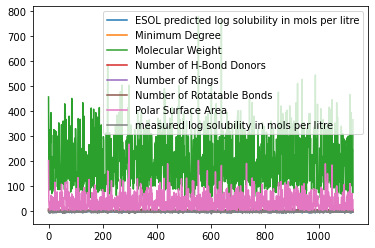

In [17]:
df.plot()

<AxesSubplot:xlabel='Number of H-Bond Donors', ylabel='ESOL predicted log solubility in mols per litre'>

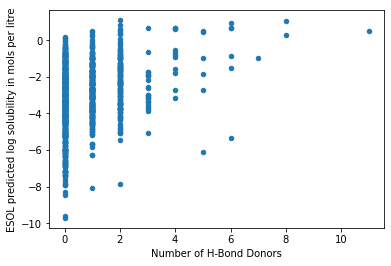

In [18]:
df.plot(x="Number of H-Bond Donors", y="ESOL predicted log solubility in mols per litre", kind="scatter")